In [17]:
from transformers import AutoImageProcessor, SwinForImageClassification
import torch
from datasets import load_dataset
from PLT import Image

In [25]:
img_to_test = '106490881_5a2dd9b7bd.jpg'
image = Image.open(img_to_test)

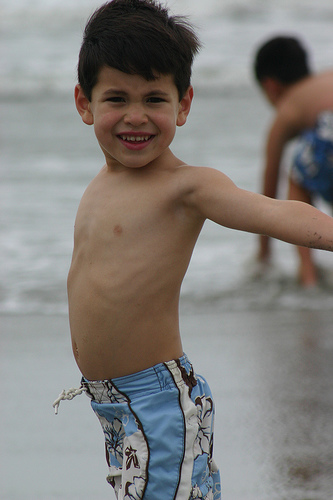

In [26]:
image

In [27]:
image_processor = AutoImageProcessor.from_pretrained("microsoft/swin-tiny-patch4-window7-224")
model = SwinForImageClassification.from_pretrained("microsoft/swin-tiny-patch4-window7-224")

inputs = image_processor(image, return_tensors="pt")

with torch.no_grad():
    logits = model(**inputs).logits



Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


In [28]:
# model predicts one of the 1000 ImageNet classes
predicted_label = logits.argmax(-1).item()
print(model.config.id2label[predicted_label])

swimming trunks, bathing trunks
